In [1]:
import numpy as np
from numpy import exp

from lgr.options import Options
from lgr.batchLGR.lgr import LGR

In [2]:
N = 200 
D = 1 
stds = 0.2
seed = 411
np.random.seed(seed)

In [3]:
# plotting doesn't work for 2D data - but learning does
def generate_2d_data():
    X = (np.random.rand(N, D) - 0.5)*2
    Yorig = np.vstack((exp(-X[:, 0] ** 2 * 10), exp(-X[:, 1] ** 2 * 50), 1.25 * exp(-(X[:, 0] ** 2 + X[:, 1] ** 2) * 5))).max(0)
    Y = np.reshape(Yorig, [N, 1]) + stds * np.random.randn(N, 1)
    return X, Y

def generate_1d_data_simple():
    N = 200
    XX = ((np.random.rand(N,1)-.5)*4)+2;
    YY = np.sin(XX) +np.random.randn(N,1)*0.01
    return XX, YY

def generate_1d_data_nonstationary():
    X = (np.random.rand(N, 1) - 0.5)*4
    Yorig = np.sin(2*X)+2*np.exp(-16*X*X)
    Y = np.reshape(Yorig, [N, 1]) + stds * np.random.randn(N, 1)
    return X, Y

In [4]:
opt = Options(D)
opt.activ_thresh = 0.4
opt.print_options()

options: 
 norm_out: 1.0
 max_iter: 100
 init_lambda: 0.3
 activ thresh: 0.4


In [5]:
X, Y = generate_1d_data_nonstationary()
model = LGR(opt, D)
debug = False
model.initialize_local_models(X)
initial_local_models = model.get_local_model_activations(X)
nmse = model.run(X, Y, 100, debug)
print "final nmse: {}".format(nmse[-1])

initial nmse: 1.0554964710196393
final nmse: 0.0556217516894


In [6]:
Yp = model.predict(X)
final_local_models = model.get_local_model_activations(X)

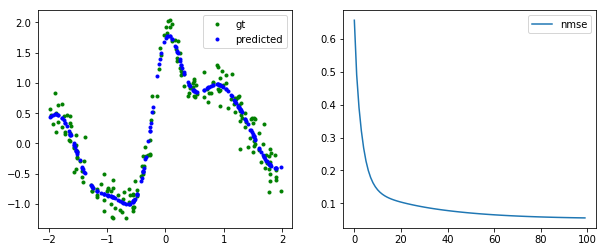

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(X[:, 0], Y[:, 0], '.g', label='gt')
plt.plot(X[:, 0], Yp[:, 0], '.b', label='predicted')
plt.legend()
plt.subplot(122)
plt.plot(nmse, label='nmse')
plt.legend()

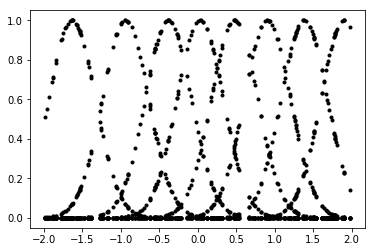

In [8]:
plt.figure()

plt.plot(X[:, 0], initial_local_models, '.k')

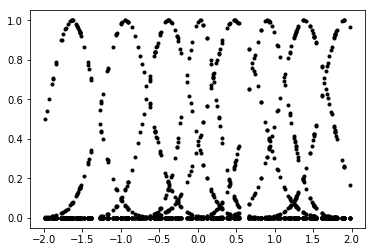

In [9]:
plt.figure()
plt.plot(X[:, 0], final_local_models, '.k')